In [83]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
import numpy as np
import matplotlib.pyplot as plt
from solvers import FEM_HelmholtzImpedance, Exact_HelmholtzImpedance
from utils import plot_validation

plt.rcParams["figure.autolayout"] = True

## Defining the parameters of the equation

In [85]:
f = lambda x: 10  # Source function
k = 8. * (np.pi / 2)  # frequency
a, b = -1., +1.  # Domain
ga, gb = 5., 2.  # Values at the boundaries

## Solving the equation

In [86]:
exact = Exact_HelmholtzImpedance([f(0), 0], k, a, b, ga, gb, source='const')
exact.verify()
u, u_x = exact()

solver = FEM_HelmholtzImpedance(
    f(0), k, a, b, ga, gb,
    N=50,
    N_quad=100,
    source='const',
    )
solver.solve()
r, r_x = solver.sol, solver.der

experiment_name = f'FEM-Const-MidFreq-N{solver.N:04d}'

/home/sepeehr/anaconda3/envs/mcss/lib/python3.9/site-packages/scipy/special/orthogonal.py:331: RuntimeWarning: invalid value encountered in double_scalars
  hn *= _gam(n + beta + 1.0) / _gam(n + 1) / _gam(n + ab1)
/home/sepeehr/anaconda3/envs/mcss/lib/python3.9/site-packages/scipy/special/orthogonal.py:332: RuntimeWarning: invalid value encountered in double_scalars
  kn = _gam(2 * n + ab1) / 2.0**n / _gam(n + 1) / _gam(n + ab1)
/home/sepeehr/anaconda3/envs/mcss/lib/python3.9/site-packages/scipy/special/orthogonal.py:139: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))


## Plotting the basis functions

In [87]:
# from testfuncs import Finite_Elements

# testfuncs = 10
# finite_elements = Finite_Elements(testfuncs - 1, a, b, dtype=np.ndarray)()

# plt.rcParams['figure.figsize'] = [10, 5]
# fig, ax = plt.subplots()
# xpts = np.linspace(a - .05, b + .05, 1000)
# for v_k in finite_elements[:]:
#     ypts = v_k.deriv(0)(xpts)
#     ax.plot(xpts, ypts)
# ax.set_ylim([-1, +2])
# ax.set_xlim([a - .5, b + .5])
# ax.grid()
# ax.set(xlabel='x', ylabel='Basis functions')

## Plotting the solver matrices

In [88]:
# print('Condition number of A:', np.linalg.cond(solver.A))

# plt.rcParams['figure.figsize'] = [10, 5]
# fig, axs = plt.subplots(4, 2)
# fig.tight_layout(pad=3.0)

# for Arow in solver.A:
#     axs[0, 0].plot(Arow.real)
#     axs[0, 1].plot(Arow.imag)
# axs[0, 0].set_title('Re(A)')
# axs[0, 0].grid()
# axs[0, 1].set_title('Im(A)')
# axs[0, 1].grid()

# axs[1, 0].plot(solver.d.real)
# axs[1, 0].set_title('Re(d)')
# axs[1, 0].grid()
# axs[1, 1].plot(solver.d.imag)
# axs[1, 1].set_title('Im(d)')
# axs[1, 1].grid()

# axs[2, 0].plot(solver.c.real)
# axs[2, 0].set_title('Re(c)')
# axs[2, 0].grid()
# axs[2, 1].plot(solver.c.imag)
# axs[2, 1].set_title('Im(c)')
# axs[2, 1].grid()

# axs[3, 0].plot((solver.A @ solver.c - solver.d).real)
# axs[3, 0].set_title('Re(err)')
# axs[3, 0].grid()
# axs[3, 1].plot((solver.A @ solver.c - solver.d).imag)
# axs[3, 1].set_title('Im(err)')
# axs[3, 1].grid()


## Evaluating the result

In [89]:
errs = solver.H1_error(u, u_x)

print(f'H1-error: \t\t{errs[0]:.2e}')
print(f'Solution L2-error: \t{errs[1]:.2e}')
print(f'Derivative L2-error: {errs[2]:.2e}')

H1-error: 		1.73e-01
Solution L2-error: 	3.96e-03
Derivative L2-error: 1.69e-01


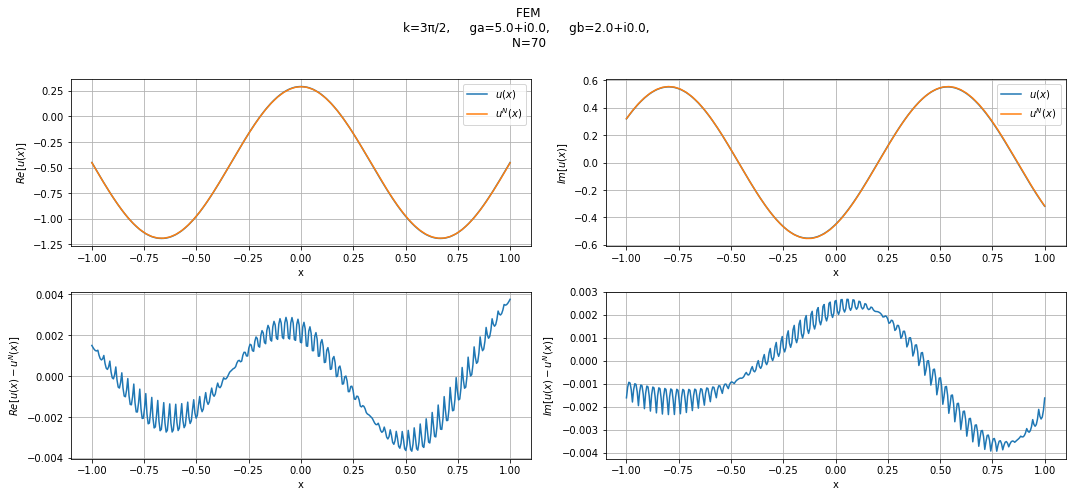

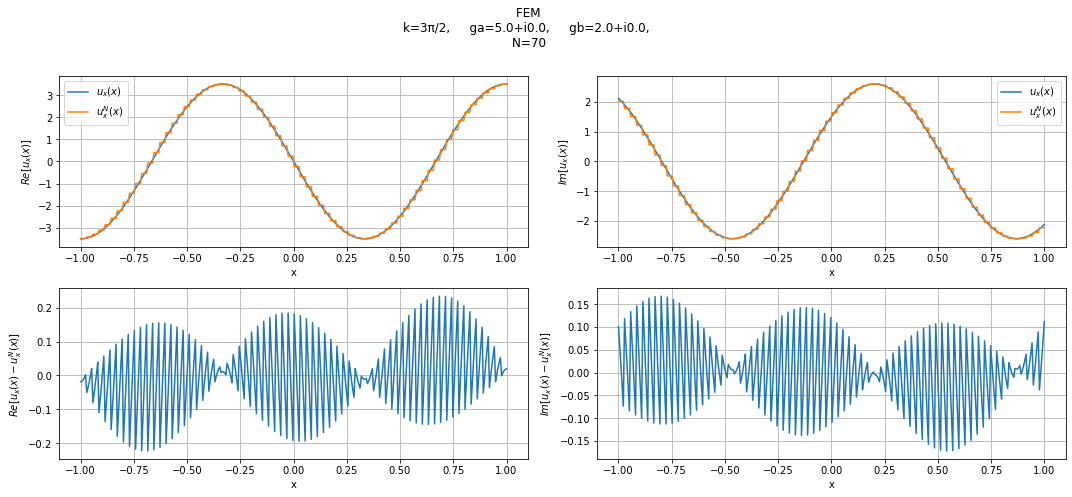

In [90]:
title = f'FEM\
    \nk={round(solver.k/(np.pi/2))}π/2, \
    ga={solver.ga.real}+i{solver.ga.imag}, \
    gb={solver.gb.real}+i{solver.gb.imag}, \
    \nN={solver.N}\
    \n'

xpts = np.linspace(a, b, solver.N * 5)
upts = np.zeros_like(xpts, dtype=complex)
rpts = np.zeros_like(xpts, dtype=complex)

for i, x in enumerate(xpts):
    upts[i] = u(x)
    rpts[i] = r(x)
file = '../results/FEM_HelmholtzImpedance/' + experiment_name + '-sol.png'
plot_validation(xpts, (upts.real, upts.imag), (rpts.real, rpts.imag), title=title, subscript='', file=file)

for i, x in enumerate(xpts):
    upts[i] = u_x(x)
    rpts[i] = r_x(x)
file = '../results/FEM_HelmholtzImpedance/' + experiment_name + '-der.png'
plot_validation(xpts, (upts.real, upts.imag), (rpts.real, rpts.imag), title=title, subscript='_x', file=file)